In [4]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

data = fetch_california_housing(as_frame=True)

In [5]:
X= data.data
y=data.target
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
X.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


In [9]:
from sklearn.model_selection import train_test_split
Xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=1)

In [10]:
from sklearn.tree import DecisionTreeRegressor
model_dt=DecisionTreeRegressor()
model_dt.fit(Xtrain,ytrain)

DecisionTreeRegressor()

In [11]:
pred_dt = model_dt.predict(xtest)

In [12]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,pred_dt)


0.5383266967832557

In [13]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(Xtrain, ytrain)


RandomForestRegressor()

In [14]:
pred_rf=model_rf.predict(xtest)
mean_squared_error(ytest,pred_rf)

0.25903771481501264

In [17]:
N = []
MSE = []

for n in np.arange(10, 120, 10):
    rf = RandomForestRegressor(n_estimators=n, min_samples_leaf=2)

    rf.fit(Xtrain, ytrain)
    pred_rf = rf.predict(xtest)

    N.append(n)
    MSE.append(mean_squared_error(ytest, pred_rf))


Text(0, 0.5, 'MSE on test')

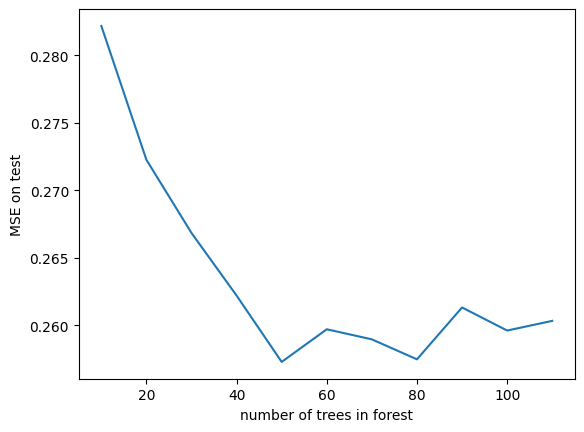

In [18]:
from matplotlib import pyplot as plt

plt.plot(N, MSE, '-')
plt.xlabel('number of trees in forest')
plt.ylabel('MSE on test')


In [19]:
D = []
MSE = []

for d in np.arange(2, 50, 5):
    rf = RandomForestRegressor(n_estimators=100, max_depth=d)

    rf.fit(Xtrain, ytrain)
    pred_rf = rf.predict(xtest)

    D.append(d)
    MSE.append(mean_squared_error(ytest, pred_rf))


Text(0, 0.5, 'MSE on test')

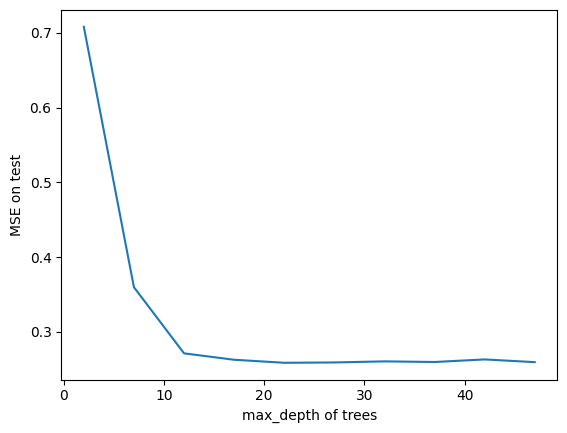

In [20]:

plt.plot(D, MSE, '-')
plt.xlabel('max_depth of trees')
plt.ylabel('MSE on test')


In [21]:
model_rf = RandomForestRegressor(n_estimators=45, max_depth=17)

model_rf.fit(Xtrain, ytrain)

pred_rf = model_rf.predict(xtest)

mean_squared_error(ytest, pred_rf)


0.2645721246993554